<center> Convolutional Neural Network to Predict Sicknesses in Lemon Leaves </center>

Dataset: https://www.kaggle.com/datasets/mahmoudshaheen1134/lemon-leaf-disease-dataset-lldd

TensorFlow & Keras (Deep Learning & Model Building)

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.metrics import Precision, Recall, Accuracy
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image, image_dataset_from_directory

General Purpose Libraries

In [11]:
import os
import random
import numpy as np
import imghdr

Image Processing

In [12]:
import cv2

Visualization

In [13]:
import matplotlib.pyplot as plt

Data Import and Data Preparation

In [14]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')  # List of all available GPUs available on the system that TensorFlow can access.
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)  # Set memory growth for each GPU

In [15]:
tf.config.list_physical_devices('GPU')

[]

In [16]:
# Path to dataset
data_dir = r"C:\Users\manue\Desktop\DataScience\Datasets\Original Dataset"

In [17]:
# Load dataset
batch_size = 32
img_size = (224, 224)  # Resize images

train_ds = image_dataset_from_directory(
    data_dir,
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

Found 1354 files belonging to 9 classes.


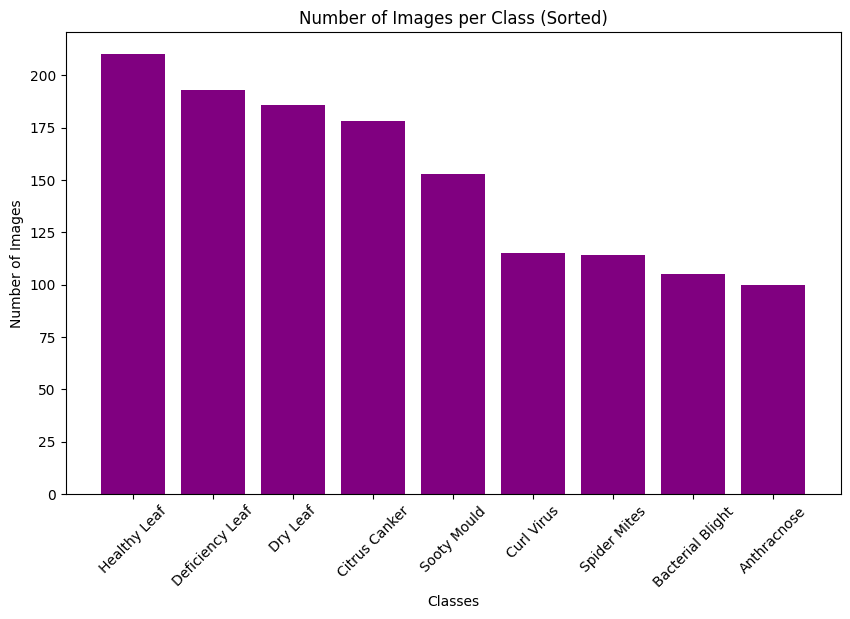

In [18]:
# Count images per class
class_counts = {folder: len(os.listdir(os.path.join(data_dir, folder)))
                for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))}

# Sort by number of images (descending)
sorted_classes = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)
class_names, class_values = zip(*sorted_classes)

# Plot the sorted class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_values, color="purple")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class (Sorted)")
plt.xticks(rotation=45)
plt.show()

In [19]:
# Load data and shuffle it
data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(256, 256),
    batch_size=batch_size,
    shuffle=True,  # Ensure data is shuffled
    label_mode='int'  
)

Found 1354 files belonging to 9 classes.


In [20]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

# Extract class names
class_names = data.class_names  
print(class_names)

Found 1354 files belonging to 9 classes.
['Anthracnose', 'Bacterial Blight', 'Citrus Canker', 'Curl Virus', 'Deficiency Leaf', 'Dry Leaf', 'Healthy Leaf', 'Sooty Mould', 'Spider Mites']


In [21]:
data = data.map(lambda x,y: (x/255, y))

In [22]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [23]:
train = data.take(train_size).shuffle(1000)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Deep Learning Model

In [24]:
model = Sequential()

In [25]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))  # Increased filters for deeper layers
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(9, activation='softmax'))  # softmax for multi-class classification

c:\Users\manue\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         2,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,803,369 (64.10 MB)

 Trainable params: 16,803,369 (64.10 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
logdir='logs'

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.2371 - loss: 2.8102 - val_accuracy: 0.5508 - val_loss: 1.2386
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.7146 - loss: 0.8940 - val_accuracy: 0.7773 - val_loss: 0.7493
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.8511 - loss: 0.5112 - val_accuracy: 0.8086 - val_loss: 0.5322
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.8998 - loss: 0.2994 - val_accuracy: 0.8320 - val_loss: 0.6684
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.9297 - loss: 0.2238 - val_accuracy: 0.8828 - val_loss: 0.4606
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.9552 - loss: 0.1664 - val_accuracy: 0.9023 - val_loss: 0.3871
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9924 - loss: 0.0529 - val_accuracy: 0.8359 - val_loss: 0.6586
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.9665 - loss: 0.1084 - val_accuracy: 0.8789 - val_loss:

Model Evaluation and Testing

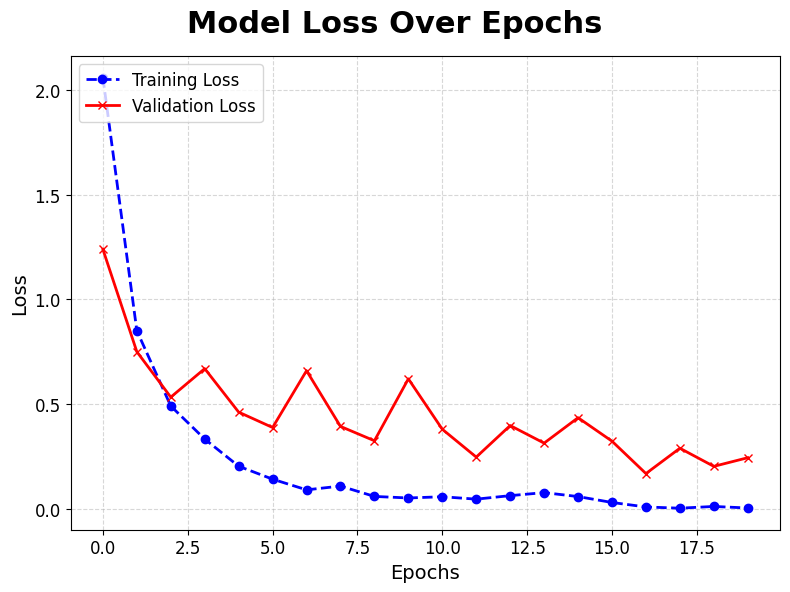

In [31]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(hist.history['loss'], color='blue', label='Training Loss', linestyle='--', marker='o', linewidth=2)
ax.plot(hist.history['val_loss'], color='red', label='Validation Loss', linestyle='-', marker='x', linewidth=2)

# titles and labels 
fig.suptitle('Model Loss Over Epochs', fontsize=22, fontweight='bold')
ax.set_xlabel('Epochs', fontsize=14)
ax.set_ylabel('Loss', fontsize=14)

# ticks and grid
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.5)

# legend 
ax.legend(loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()


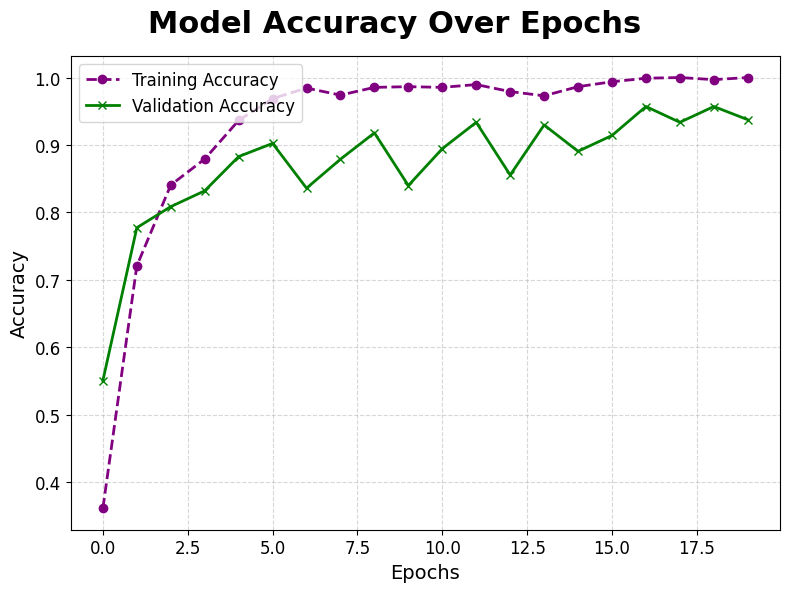

In [32]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(hist.history['accuracy'], color='purple', label='Training Accuracy', linestyle='--', marker='o', linewidth=2)
ax.plot(hist.history['val_accuracy'], color='green', label='Validation Accuracy', linestyle='-', marker='x', linewidth=2)

# titles and labels 
fig.suptitle('Model Accuracy Over Epochs', fontsize=22, fontweight='bold')
ax.set_xlabel('Epochs', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)

# ticks and grid
ax.tick_params(axis='both', which='major', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.5)

# legend with larger font size
ax.legend(loc='upper left', fontsize=12)


plt.tight_layout()
plt.show()

In [33]:
pre = Precision()
re = Recall()
acc = Accuracy()

In [34]:
for batch in test.as_numpy_iterator(): 
    x, y = batch
    yhat = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


In [35]:
yhat_classes = tf.argmax(yhat, axis=-1) 

In [36]:
pre.update_state(y, yhat_classes)
re.update_state(y, yhat_classes)
acc.update_state(y, yhat_classes)

In [37]:
print(f"Precision: {pre.result().numpy():.4f}")
print(f"Recall: {re.result().numpy():.4f}")
print(f"Accuracy: {acc.result().numpy():.4f}")

Precision: 1.0000
Recall: 1.0000
Accuracy: 0.9062


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━

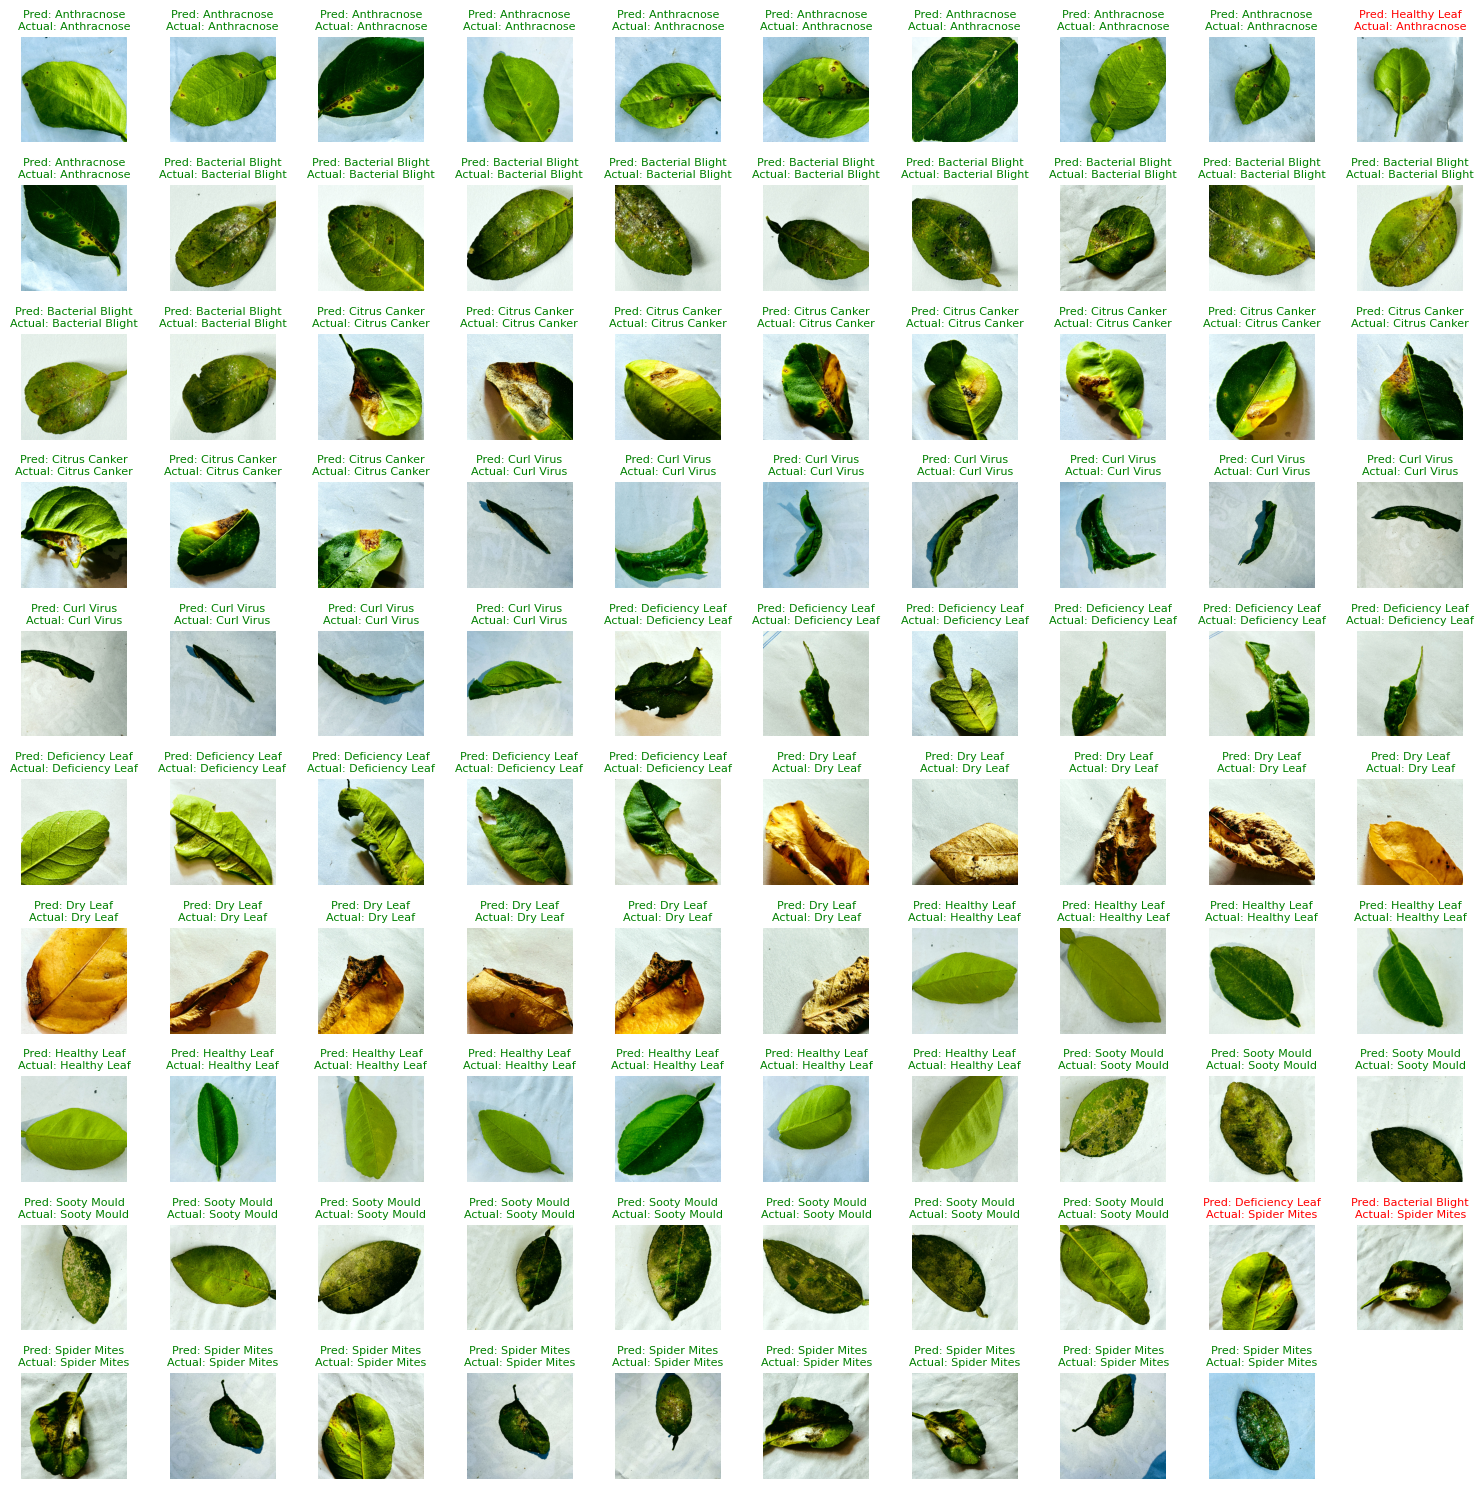


Total Images Tested: 99
Incorrect Predictions: 3
Accuracy: 96.97%


In [38]:
# Path to dataset
dataset_path = r"C:\Users\manue\Desktop\DataScience\Datasets\Original Dataset"

# class names 
class_names = sorted(os.listdir(dataset_path))  # Sorted to match training order
num_classes = len(class_names)

# Dictionary to store image paths per class
image_paths = {class_name: [] for class_name in class_names}

# Collect all image paths for each class
for class_name in class_names:
    class_folder = os.path.join(dataset_path, class_name)
    image_paths[class_name] = [os.path.join(class_folder, img) for img in os.listdir(class_folder)]

# Select 100 images (~11 per class)
selected_images = []
for class_name in class_names:
    selected_images.extend(random.sample(image_paths[class_name], min(11, len(image_paths[class_name]))))

# Initialize counters
incorrect_predictions = 0

plt.figure(figsize=(15, 15))
for i, img_path in enumerate(selected_images[:100]):  # Limit to 100 images
    # Load image
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    actual_class = os.path.basename(os.path.dirname(img_path))  # Get folder name as actual label

    # Check correctness
    if predicted_class != actual_class:
        incorrect_predictions += 1

    # Display image with prediction
    ax = plt.subplot(10, 10, i + 1)
    plt.imshow(img)
    plt.title(f"Pred: {predicted_class}\nActual: {actual_class}", fontsize=8, color="red" if predicted_class != actual_class else "green")
    plt.axis("off")

plt.tight_layout()
plt.show()

# Print final accuracy stats
print(f"\nTotal Images Tested: {len(selected_images[:100])}")
print(f"Incorrect Predictions: {incorrect_predictions}")
print(f"Accuracy: {100 - (incorrect_predictions / len(selected_images[:100]) * 100):.2f}%")


Export/Save the Trained Model

In [43]:
# save the model
import keras.saving
keras.saving.save_model(model, 'model.keras')

Wrapper Function to Load the Model

In [42]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# function to load the saved CNN model
def load_model():
    model = tf.keras.models.load_model('model.keras')  # Update with your model file path
    return model

# function to preprocess the input image data
def preprocess_input(input_image):
    # Load the image and resize to match the model's input shape (224x224 is common for CNNs)
    img = image.load_img(input_image, target_size=(224, 224))  # Adjust size as needed
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image if required (common for CNNs)
    return img_array

# function to make predictions with the CNN model
def predict(input_image):
    model = load_model()  # Load the model
    processed_image = preprocess_input(input_image)  # Preprocess the image
    prediction = model.predict(processed_image)  # Make prediction
    predicted_class = np.argmax(prediction, axis=1)[0]  # Convert prediction to class index
    return predicted_class
